In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
#Reading the given csv file
df=pd.read_csv("data_file.csv")

In [ ]:
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


#DATA PREPROCESSING

In [ ]:
#Check if any column has some null values
df.isnull().sum()

,0
FileName,0
md5Hash,0
Machine,0
DebugSize,0
DebugRVA,0
MajorImageVersion,0
MajorOSVersion,0
ExportRVA,0
ExportSize,0
IatVRA,0


In [ ]:
#describe the given dataframe
df.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [ ]:
#Drop less important columns (features)
df.drop(['FileName','md5Hash'],axis=1,inplace=True)

In [ ]:
#Make correlation matrix for checking the dependency of output i.e. detection of ransomware on different features
correlation_matrix = df.corr()

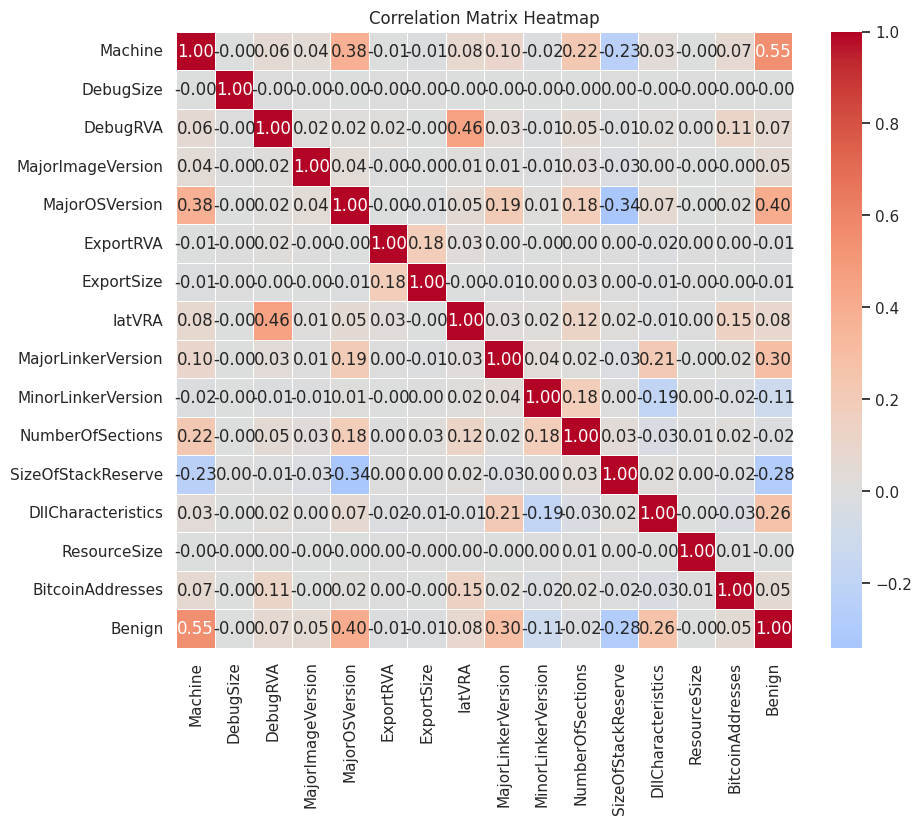

In [ ]:
# Set the figure size and style
plt.figure(figsize=(10, 8))
sns.set(style='white')

# Create the heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#From correlation matrix we observed that some of the features are not important so we dropped them.
df.drop(['ResourceSize','NumberOfSections','ExportSize','ExportRVA','DebugSize'],axis=1,inplace=True)

In [ ]:
df.head()

,Machine,DebugRVA,MajorImageVersion,MajorOSVersion,IatVRA,MajorLinkerVersion,MinorLinkerVersion,SizeOfStackReserve,DllCharacteristics,BitcoinAddresses,Benign
0,332,0,0,4,8192,8,0,1048576,34112,0,1
1,34404,121728,10,10,0,14,10,262144,16864,0,1
2,332,0,0,4,8192,8,0,1048576,34112,0,1
3,34404,19904,10,10,18160,14,10,262144,16736,0,1
4,34404,97728,10,10,70592,14,10,262144,16736,0,1


In [ ]:
#Split the data into 2 parts one is input and other is output for supervised learning
X = df.iloc[:,1 :-1].values
y = df.iloc[:,-1].values

In [ ]:
#Split the data into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and test sets
print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', y_test.shape)

Shape of the training input data: (49988, 9)
Shape of the training output data: (49988,)
Shape of the test input data: (12497, 9)
Shape of the test output data: (12497,)


#SVM

In [ ]:

# Initialize the SVM model with the RBF kernel
svm_model = SVC(kernel='rbf', gamma='scale',probability=True)  # `gamma='scale'` adjusts gamma automatically
# Train the model on the training data
svm_model.fit(X_train, y_train)


SVC(probability=True)

Accuracy: 0.8366007841882052

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      7125
           1       0.96      0.65      0.77      5372

    accuracy                           0.84     12497
   macro avg       0.87      0.81      0.82     12497
weighted avg       0.86      0.84      0.83     12497


Confusion Matrix:
 [[6969  156]
 [1886 3486]]


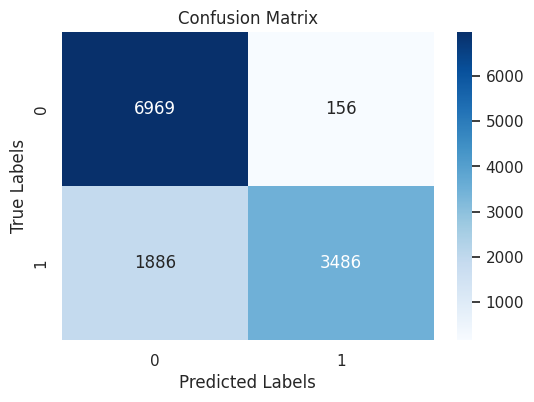

In [ ]:

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


#**ARTIFICIAL NEURAL NETWORK**

In [ ]:
ann = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=1)
ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)
print("Accuracy:", ann.score(X_test, y_test))
cm_ann = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Artificial Neural Network:")
print(cm_ann)
plt.figure()
plot_confusion_matrix(cm_ann, figsize=(8, 6))
plt.title("Confusion Matrix - Artificial Neural Network")
plt.show()
print("Classification Report - Artificial Neural Network:")
print(classification_report(y_test, y_pred))
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report - ANN:")
print(class_report)

#RANDOM FOREST

In [ ]:

# Initialize and train the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


In [ ]:
# Make predictions
y_pred = model_rf.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



In [ ]:

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix for Random Forest Classifier:")
print(cm)
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix -Random Forest Classifier")
plt.show()

In [ ]:
import joblib
joblib.dump(model_rf, 'ransomware_detection_model.pkl')


#LSTM

In [ ]:
#Importing important libraries
import tensorflow
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Loading Model
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1, activation='sigmoid'))

In [ ]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model_lstm.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

In [ ]:
accuracy = model_lstm.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
y_pred = (model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

In [ ]:
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

#ENSEMBLE MODEL

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', model_rf),
    ('ann',ann)
], voting='soft')

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Ransomware', 'Ransomware'], yticklabels=['Non-Ransomware', 'Ransomware'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:

y_pred_proba = ensemble_model.predict_proba(X_test)


In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
